In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sea
from scipy.interpolate import RectBivariateSpline
from mpl_toolkits.mplot3d import Axes3D

#custom modules
from plotting import create_3D_loss_manifold

sea.set(style="white")

In [7]:
def load_datapd(m1,m2, decay= "qq", fpr_cut = 1e-3):
    
    extra = True
    extra_str = "_extra" if extra else ""
    pdir = "/pscratch/sd/g/gupsingh/"
    noise_dims = 0
    noise = False
    #robust-river-109qq10
    if decay == "qq":
        #model_name = "robust-river-109qq10"
        model_name = "decent-sun-87qq"
        #model_name = "easy-monkey-107qq_reduced"
        tuple_rates_dedicated = np.load(f"tuple_rates_dedicated_benchmark_extra{decay}{noise_dims}.npy", allow_pickle = True).item()
        tuple_rates_parametrized = np.load(f"tuples_rates_parametrized_{model_name}{noise_dims}.npy", allow_pickle = True).item()
        tuple_rates_semiweak = np.load(pdir + f"data/script/tuplerates_{float(m1)}{float(m2)}_{decay}{extra_str}{model_name}{noise}.npy", allow_pickle = True).item()
        tuple_rates_weak = np.load(pdir + f"data/script/tuplerates2_{float(m1)}{float(m2)}_{decay}{extra_str}{model_name}{noise}.npy", allow_pickle = True).item()
        weight_list3 = np.array(np.load(pdir + f"data/script/weight_list3_runs_{float(m1)}{float(m2)}_{decay}{extra_str}{model_name}{noise}.npy"))
    # if decay == "qqq":
    #     model_name = "swift-firebrand-91EXTRAnoise"
    #     tuple_rates_dedicated = np.load("tuple_rates_dedicated_benchmark_extraqqq.npy", allow_pickle = True).item()
    #     tuple_rates_parametrized = np.load("tuples_rates_parametrized_breathless-flower-61qqqqqq.npy", allow_pickle = True).item()
    #     tuple_rates_semiweak = np.load(pdir + f"data/23prong/tuplerates_{float(m1)}{float(m2)}_{decay}{extra_str}{model_name}23.npy", allow_pickle = True).item()
    #     tuple_rates_weak = np.load(pdir + f"data/23prong/tuplerates2_{float(m1)}{float(m2)}_{decay}{extra_str}{model_name}23.npy", allow_pickle = True).item()
    #     weight_list3 = np.array(np.load(pdir + f"data/23prong/weight_list3_runs_{float(m1)}{float(m2)}_{decay}{extra_str}{model_name}23.npy"))
    #     weight_list4 = np.array(np.load(pdir + f"data/23prong/weight_list4_runs_{float(m1)}{float(m2)}_{decay}{extra_str}{model_name}23.npy"))
    if decay == "qqq":
        model_name = "23prongFalse"
        tuple_rates_dedicated = np.load("tuple_rates_dedicated_benchmark_extraqqq.npy", allow_pickle = True).item()
        tuple_rates_parametrized = np.load("tuples_rates_parametrized_breathless-flower-61qqqqqq.npy", allow_pickle = True).item()
        tuple_rates_semiweak = np.load(pdir + f"data/script/tuplerates_{float(m1)}{float(m2)}_{decay}{extra_str}{model_name}.npy", allow_pickle = True).item()
        tuple_rates_weak = np.load(pdir + f"data/script/tuplerates2_{float(m1)}{float(m2)}_{decay}{extra_str}{model_name}.npy", allow_pickle = True).item()
        weight_list3 = np.array(np.load(pdir + f"data/script/weight_list3_runs_{float(m1)}{float(m2)}_{decay}{extra_str}{model_name}.npy"))
        weight_list4 = np.array(np.load(pdir + f"data/script/weight_list4_runs_{float(m1)}{float(m2)}_{decay}{extra_str}{model_name}.npy"))

#     fpr_full = tuple_rates_dedicated[(m1, m2)][0]
#     tpr_full = tuple_rates_dedicated[(m1, m2)][1]
#     fpr_parametrized = tuple_rates_parametrized[(m1, m2)][0]
#     tpr_parametrized = tuple_rates_parametrized[(m1, m2)][1]

#     index_full = np.argmin(np.abs(np.array(fpr_full) - fpr_cut))
#     index_parametrized = np.argmin(np.abs(np.array(fpr_parametrized) - fpr_cut))

#     fpr_full_cut = fpr_full[index_full]
#     tpr_full_cut = tpr_full[index_full]
#     fpr_parametrized_cut = fpr_parametrized[index_parametrized]
#     tpr_parametrized_cut = tpr_parametrized[index_parametrized]

#     maxsic_full = np.max(tpr_full_cut/np.sqrt(fpr_full_cut))
#     print(f"FS: {maxsic_full}")

#     maxsic_parametrized = np.max(tpr_parametrized_cut/np.sqrt(fpr_parametrized_cut))
#     print(f"Parametrized: {maxsic_parametrized}")

    #sigspace = np.logspace(-3, -1, 10)
    sigspace = np.logspace(-3.5, -1.3, 10)
    injections = 10
    sigmoid = lambda x: 1. / (1. + np.exp(-x))
    max_sics = []
    max_sics2 = []

    max_std = []
    max_std2 = []
    errlos = []
    errhis = []

    muhis = []
    mulows = []
    mus = []

    alphahis = []
    alphalows = []
    alphas = []

    count = 0
    for sigfrac in sigspace:

        max_sic_injections = []
        max_sic_injections2 = []
        for injection in range(injections):

            #extract fpr and tpr, use specific fpt cut to determine SIC
            fpr = tuple_rates_semiweak[(sigfrac, injection)][0]
            tpr = tuple_rates_semiweak[(sigfrac, injection)][1]

            fpr2 = tuple_rates_weak[(sigfrac, injection)][0]
            tpr2 = tuple_rates_weak[(sigfrac, injection)][1]

            index = np.argmin(np.abs(np.array(fpr) - fpr_cut))
            index2 = np.argmin(np.abs(np.array(fpr2) - fpr_cut))

            fpr_cut = fpr[index]
            tpr_cut = tpr[index]

            fpr2_cut = fpr2[index2]
            tpr2_cut = tpr2[index2]

            maxsic = np.max(tpr_cut / np.sqrt(fpr_cut))
            maxsic2 = np.max(tpr2_cut / np.sqrt(fpr2_cut))
            max_sic_injections.append(maxsic)
            max_sic_injections2.append(maxsic2)

        mu_injections = np.median(np.exp(weight_list3[count]), axis = 1)        
        muhis.append(np.quantile(mu_injections, 0.84))
        mulows.append(np.quantile(mu_injections, 0.16))
        mus.append(np.median(mu_injections, axis = 0))

        if decay == "qqq":
            alpha_injections = np.median((sigmoid(np.array(weight_list4[count]))), axis = 1) 
            alphahis.append(np.quantile(alpha_injections, 0.84))
            #print(alphahis)
            alphalows.append(np.quantile(alpha_injections, 0.16))
            alphas.append(np.median(alpha_injections, axis = 0))

        count+=1

        errhis.append(np.quantile(max_sic_injections, 0.84, axis=0))
        errlos.append(np.quantile(max_sic_injections, 0.16, axis=0))
        max_sics.append(np.median(max_sic_injections, axis = 0))

        max_std.append(np.std(max_sic_injections, axis = 0))
        max_sics2.append(np.median(max_sic_injections2, axis = 0))
        max_std2.append(np.std(max_sic_injections2, axis = 0))
    
    if decay == "qqq":
        data_pd = pd.DataFrame({
            "Semi-Weak Max Sics Medians": max_sics,
            "Semi-Weak Upper Quartile": errhis,
            "Semi-Weak Lower Quartile": errlos,
            "CWOLA Max Sics Medians": max_sics2,
            "CWOLA Max Sics Std": max_std2,
            #"FS Max Sics": [maxsic_full]*len(sigspace),
            #"Parametrized Max Sics": [maxsic_parametrized]*len(sigspace),
            "mu medians": mus, 
            "mu Upper Quartile": muhis,
            "mu Lower Quartile": mulows,
            "alpha medians": alphas,
            "alpha Upper Quartile": alphahis,
            "alpha Lower Quartile": alphalows,
        })
        
    if decay == "qq":
        data_pd = pd.DataFrame({
            "Semi-Weak Max Sics Medians": max_sics,
            "Semi-Weak Upper Quartile": errhis,
            "Semi-Weak Lower Quartile": errlos,
            "CWOLA Max Sics Medians": max_sics2,
            "CWOLA Max Sics Std": max_std2,
            "FS Max Sics": [maxsic_full]*len(sigspace),
            "Parametrized Max Sics": [maxsic_parametrized]*len(sigspace),
            "mu medians": mus, 
            "mu Upper Quartile": muhis,
            "mu Lower Quartile": mulows,
        })
           
    data_pd.index = sigspace
    data_pd.index.name = "Signal fraction"
    return data_pd

In [8]:
df = load_datapd(1, 5, decay = "qqq", fpr_cut = 1e-3)
df

,Semi-Weak Max Sics Medians,Semi-Weak Upper Quartile,Semi-Weak Lower Quartile,CWOLA Max Sics Medians,CWOLA Max Sics Std,mu medians,mu Upper Quartile,mu Lower Quartile,alpha medians,alpha Upper Quartile,alpha Lower Quartile
Signal fraction,,,,,,,,,,,
0.000316,0.759403,5.275134,0.256439,0.000889,0.003429,0.002075,0.002507,0.001662,0.760369,0.912047,0.561703
0.000555,1.417538,9.549615,0.461238,0.002693,0.101353,0.001347,0.002136,0.001112,0.844361,0.913584,0.625387
0.000975,12.424358,15.398113,5.596852,0.000000,0.000246,0.003651,0.007061,0.002636,0.400141,0.734074,0.203869
0.001711,14.810003,15.414602,13.349424,0.037016,0.400853,0.005795,0.009790,0.000920,0.477948,0.744837,0.266461
0.003005,15.635633,16.130757,15.044360,1.330959,0.673291,0.016670,0.017383,0.009664,0.237309,0.380307,0.055601
0.005275,16.074792,16.261385,15.359469,5.391421,0.998219,0.020361,0.022684,0.013578,0.210174,0.301357,0.111273
0.009261,15.987812,16.236192,15.569934,7.975841,0.997865,0.030329,0.032098,0.026940,0.095568,0.304407,0.013479
0.016260,16.008476,16.246428,15.765429,10.386200,0.590968,0.040692,0.042254,0.037541,0.203998,0.314730,0.003035
0.028547,16.180860,16.229608,15.981768,12.791547,0.948277,0.057536,0.059731,0.055337,0.164933,0.269664,0.061118


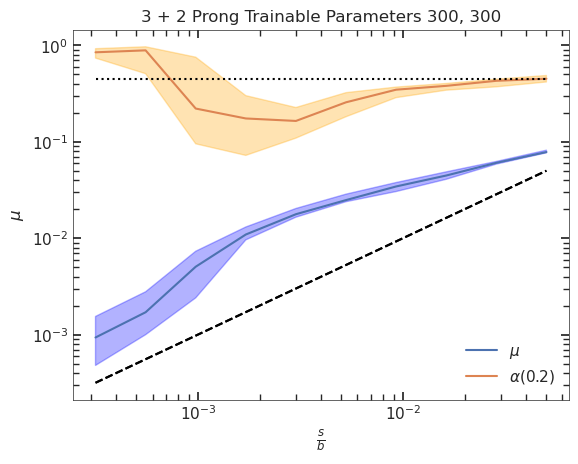

In [28]:
m1, m2 = 3, 3
mus = df["mu medians"]
muhis = df["mu Upper Quartile"]
mulows = df["mu Lower Quartile"]
alphas = df["alpha medians"]
alphahis = df["alpha Upper Quartile"]
alphalows = df["alpha Lower Quartile"]

plt.title(f"3 + 2 Prong Trainable Parameters {m1*100}, {m2*100}")
sigspace = np.logspace(-3.5, -1.3, 10)
plt.plot(sigspace, mus, label = "$\mu$")
plt.plot(sigspace, sigspace, linestyle='--', color = "black")
plt.fill_between(sigspace, mulows, muhis, color='blue', alpha=0.3, hatch = "")

plt.plot(sigspace, alphas, label = r"$\alpha (0.2)$")
plt.plot(sigspace, sigspace, linestyle='--', color = "black")
plt.fill_between(sigspace, alphalows, alphahis, color='orange', alpha=0.3, hatch = "")
plt.plot(sigspace, [alphas.iloc[-1]] * 10, ls = ":", color = "black")

plt.xlabel("$\\frac{s}{b}$")
plt.ylabel("$\mu$")
plt.xscale("log")
plt.yscale("log")
plt.legend(loc="lower right",frameon=False)
plt.gca().spines['left'].set_linewidth(0.5)
plt.gca().spines['bottom'].set_linewidth(0.5)
plt.gca().spines['top'].set_linewidth(0.5)
plt.gca().spines['right'].set_linewidth(0.5)
plt.tick_params(axis='both', which='both', direction='in', top=True, right=True)
plt.tick_params(axis='both', which='both', direction='in', bottom=True, left=True)

In [29]:
alphas

Signal fraction
0.000316    0.848350
0.000555    0.888619
0.000975    0.221315
0.001711    0.174651
0.003005    0.164596
0.005275    0.256963
0.009261    0.347363
0.016260    0.380696
0.028547    0.429327
0.050119    0.451248
Name: alpha medians, dtype: float32

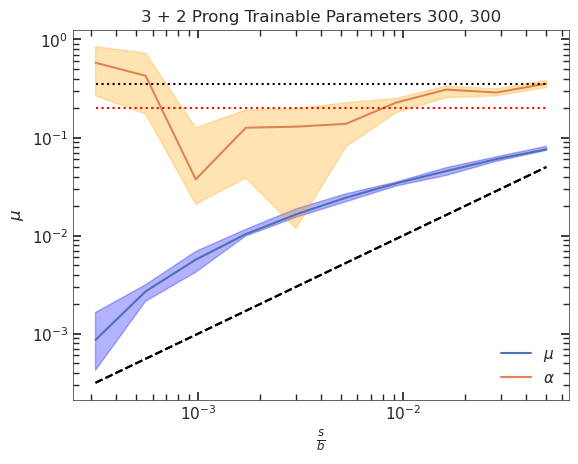

In [23]:
m1, m2 = 3, 3
mus = df["mu medians"]
muhis = df["mu Upper Quartile"]
mulows = df["mu Lower Quartile"]
alphas = df["alpha medians"]
alphahis = df["alpha Upper Quartile"]
alphalows = df["alpha Lower Quartile"]

plt.title(f"3 + 2 Prong Trainable Parameters {m1*100}, {m2*100}")
sigspace = np.logspace(-3.5, -1.3, 10)
plt.plot(sigspace, mus, label = "$\mu$")
plt.plot(sigspace, sigspace, linestyle='--', color = "black")
plt.fill_between(sigspace, mulows, muhis, color='blue', alpha=0.3, hatch = "")

plt.plot(sigspace, alphas, label = r"$\alpha$")
plt.plot(sigspace, sigspace, linestyle='--', color = "black")
plt.fill_between(sigspace, alphalows, alphahis, color='orange', alpha=0.3, hatch = "")
plt.plot(sigspace, [alphas.iloc[-1]] * 10, ls = ":", color = "black")
plt.plot(sigspace, [0.2] * 10, ls = ":", color = "red")

plt.xlabel("$\\frac{s}{b}$")
plt.ylabel("$\mu$")
plt.xscale("log")
plt.yscale("log")
plt.legend(loc="lower right",frameon=False)
plt.gca().spines['left'].set_linewidth(0.5)
plt.gca().spines['bottom'].set_linewidth(0.5)
plt.gca().spines['top'].set_linewidth(0.5)
plt.gca().spines['right'].set_linewidth(0.5)
plt.tick_params(axis='both', which='both', direction='in', top=True, right=True)
plt.tick_params(axis='both', which='both', direction='in', bottom=True, left=True)

In [22]:
alphas

Signal fraction
0.000316    0.578715
0.000555    0.427040
0.000975    0.037506
0.001711    0.126038
0.003005    0.129151
0.005275    0.138034
0.009261    0.227403
0.016260    0.308726
0.028547    0.287924
0.050119    0.354647
Name: alpha medians, dtype: float32

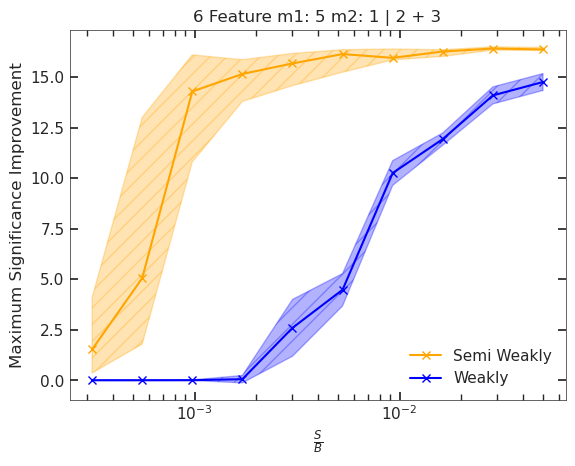

In [10]:
m1, m2 = 5, 1

msic1_ensemble = df["Semi-Weak Max Sics Medians"]
msic2_ensemble = df["CWOLA Max Sics Medians"]
std2_ensemble = df["CWOLA Max Sics Std"]
errhis = df["Semi-Weak Upper Quartile"]
errlows = df["Semi-Weak Lower Quartile"]
msic_full = df["FS Max Sics"]
msic_parametrized = df["Parametrized Max Sics"]

sigspace = np.logspace(-3.5, -1.3, 10)
plt.figure()
sea.set(style="white")
plt.plot(sigspace, msic1_ensemble, marker = "x", label='Semi Weakly', color='orange')
plt.plot(sigspace, msic2_ensemble, marker = "x", label='Weakly', color='blue')
#plt.plot(sigspace, msic_full, marker = "x", label='Fully Supervised', color='green', alpha = 0.3)
#plt.plot(sigspace, msic_parametrized, marker = "x", label='Parametrized', color='red', alpha = 0.3)

plt.fill_between(sigspace, errlows, errhis, color='orange', alpha=0.3, hatch = "//")
plt.fill_between(sigspace, msic2_ensemble - std2_ensemble, msic2_ensemble + std2_ensemble, color='blue', alpha=0.3, hatch = "//")

plt.xlabel(r'$\frac{S}{B}$')
plt.ylabel('Maximum Significance Improvement')
plt.title(f'6 Feature m1: {m1} m2: {m2} | 2 + 3')
plt.xscale("log")
plt.legend(loc="lower right",frameon=False)
plt.gca().spines['left'].set_linewidth(0.5)
plt.gca().spines['bottom'].set_linewidth(0.5)
plt.gca().spines['top'].set_linewidth(0.5)
plt.gca().spines['right'].set_linewidth(0.5)
plt.tick_params(axis='both', which='both', direction='in', top=True, right=True)
plt.tick_params(axis='both', which='both', direction='in', bottom=True, left=True)
img_path = f"plots/maxsicplot{m1}{m2}_extra.png"
#plt.gca().xaxis.set_major_formatter(FuncFormatter(convert_units))
#plt.savefig(img_path, dpi=450, bbox_inches='tight')
plt.show()

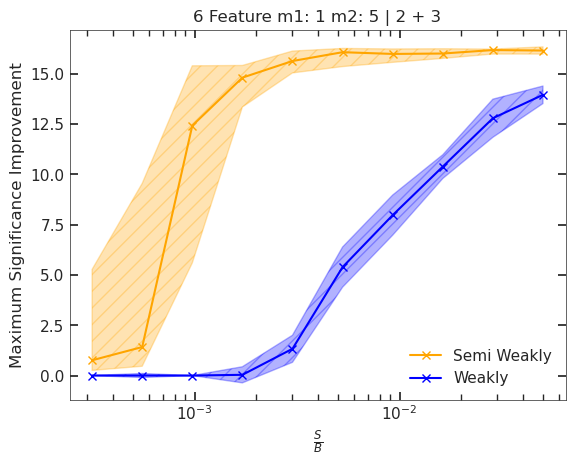

In [60]:
m1, m2 = 1, 5

msic1_ensemble = df["Semi-Weak Max Sics Medians"]
msic2_ensemble = df["CWOLA Max Sics Medians"]
std2_ensemble = df["CWOLA Max Sics Std"]
errhis = df["Semi-Weak Upper Quartile"]
errlows = df["Semi-Weak Lower Quartile"]
#msic_full = df["FS Max Sics"]
#msic_parametrized = df["Parametrized Max Sics"]

sigspace = np.logspace(-3.5, -1.3, 10)
plt.figure()
sea.set(style="white")
plt.plot(sigspace, msic1_ensemble, marker = "x", label='Semi Weakly', color='orange')
plt.plot(sigspace, msic2_ensemble, marker = "x", label='Weakly', color='blue')
#plt.plot(sigspace, msic_full, marker = "x", label='Fully Supervised', color='green', alpha = 0.3)
#plt.plot(sigspace, msic_parametrized, marker = "x", label='Parametrized', color='red', alpha = 0.3)

plt.fill_between(sigspace, errlows, errhis, color='orange', alpha=0.3, hatch = "//")
plt.fill_between(sigspace, msic2_ensemble - std2_ensemble, msic2_ensemble + std2_ensemble, color='blue', alpha=0.3, hatch = "//")

plt.xlabel(r'$\frac{S}{B}$')
plt.ylabel('Maximum Significance Improvement')
plt.title(f'6 Feature m1: {m1} m2: {m2} | 2 + 3')
plt.xscale("log")
plt.legend(loc="lower right",frameon=False)
plt.gca().spines['left'].set_linewidth(0.5)
plt.gca().spines['bottom'].set_linewidth(0.5)
plt.gca().spines['top'].set_linewidth(0.5)
plt.gca().spines['right'].set_linewidth(0.5)
plt.tick_params(axis='both', which='both', direction='in', top=True, right=True)
plt.tick_params(axis='both', which='both', direction='in', bottom=True, left=True)
img_path = f"plots/maxsicplot{m1}{m2}_extra.png"
#plt.gca().xaxis.set_major_formatter(FuncFormatter(convert_units))
#plt.savefig(img_path, dpi=450, bbox_inches='tight')
plt.show()

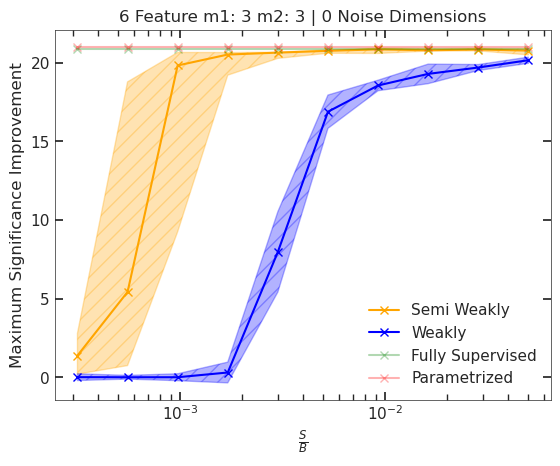

In [62]:
m1, m2 = 3, 3

msic1_ensemble = df["Semi-Weak Max Sics Medians"]
msic2_ensemble = df["CWOLA Max Sics Medians"]
std2_ensemble = df["CWOLA Max Sics Std"]
errhis = df["Semi-Weak Upper Quartile"]
errlows = df["Semi-Weak Lower Quartile"]
msic_full = df["FS Max Sics"]
msic_parametrized = df["Parametrized Max Sics"]

sigspace = np.logspace(-3.5, -1.3, 10)
plt.figure()
sea.set(style="white")
plt.plot(sigspace, msic1_ensemble, marker = "x", label='Semi Weakly', color='orange')
plt.plot(sigspace, msic2_ensemble, marker = "x", label='Weakly', color='blue')
plt.plot(sigspace, msic_full, marker = "x", label='Fully Supervised', color='green', alpha = 0.3)
plt.plot(sigspace, msic_parametrized, marker = "x", label='Parametrized', color='red', alpha = 0.3)

plt.fill_between(sigspace, errlows, errhis, color='orange', alpha=0.3, hatch = "//")
plt.fill_between(sigspace, msic2_ensemble - std2_ensemble, msic2_ensemble + std2_ensemble, color='blue', alpha=0.3, hatch = "//")

plt.xlabel(r'$\frac{S}{B}$')
plt.ylabel('Maximum Significance Improvement')
plt.title(f'6 Feature m1: {m1} m2: {m2} | 0 Noise Dimensions')
plt.xscale("log")
plt.legend(loc="lower right",frameon=False)
plt.gca().spines['left'].set_linewidth(0.5)
plt.gca().spines['bottom'].set_linewidth(0.5)
plt.gca().spines['top'].set_linewidth(0.5)
plt.gca().spines['right'].set_linewidth(0.5)
plt.tick_params(axis='both', which='both', direction='in', top=True, right=True)
plt.tick_params(axis='both', which='both', direction='in', bottom=True, left=True)
img_path = f"plots/maxsicplot{m1}{m2}_extra.png"
#plt.gca().xaxis.set_major_formatter(FuncFormatter(convert_units))
#plt.savefig(img_path, dpi=450, bbox_inches='tight')
plt.show()

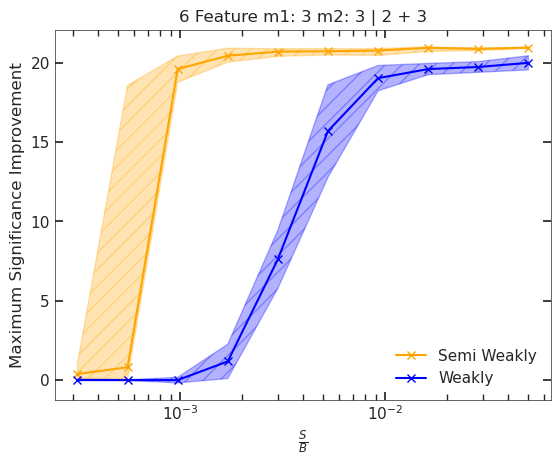

In [37]:
m1, m2 = 3, 3

msic1_ensemble = df["Semi-Weak Max Sics Medians"]
msic2_ensemble = df["CWOLA Max Sics Medians"]
std2_ensemble = df["CWOLA Max Sics Std"]
errhis = df["Semi-Weak Upper Quartile"]
errlows = df["Semi-Weak Lower Quartile"]
msic_full = df["FS Max Sics"]
msic_parametrized = df["Parametrized Max Sics"]

sigspace = np.logspace(-3.5, -1.3, 10)
plt.figure()
sea.set(style="white")
plt.plot(sigspace, msic1_ensemble, marker = "x", label='Semi Weakly', color='orange')
plt.plot(sigspace, msic2_ensemble, marker = "x", label='Weakly', color='blue')
#plt.plot(sigspace, msic_full, marker = "x", label='Fully Supervised', color='green', alpha = 0.3)
#plt.plot(sigspace, msic_parametrized, marker = "x", label='Parametrized', color='red', alpha = 0.3)

plt.fill_between(sigspace, errlows, errhis, color='orange', alpha=0.3, hatch = "//")
plt.fill_between(sigspace, msic2_ensemble - std2_ensemble, msic2_ensemble + std2_ensemble, color='blue', alpha=0.3, hatch = "//")

plt.xlabel(r'$\frac{S}{B}$')
plt.ylabel('Maximum Significance Improvement')
plt.title(f'6 Feature m1: {m1} m2: {m2} | 2 + 3')
plt.xscale("log")
plt.legend(loc="lower right",frameon=False)
plt.gca().spines['left'].set_linewidth(0.5)
plt.gca().spines['bottom'].set_linewidth(0.5)
plt.gca().spines['top'].set_linewidth(0.5)
plt.gca().spines['right'].set_linewidth(0.5)
plt.tick_params(axis='both', which='both', direction='in', top=True, right=True)
plt.tick_params(axis='both', which='both', direction='in', bottom=True, left=True)
img_path = f"plots/maxsicplot{m1}{m2}_extra.png"
#plt.gca().xaxis.set_major_formatter(FuncFormatter(convert_units))
#plt.savefig(img_path, dpi=450, bbox_inches='tight')
plt.show()

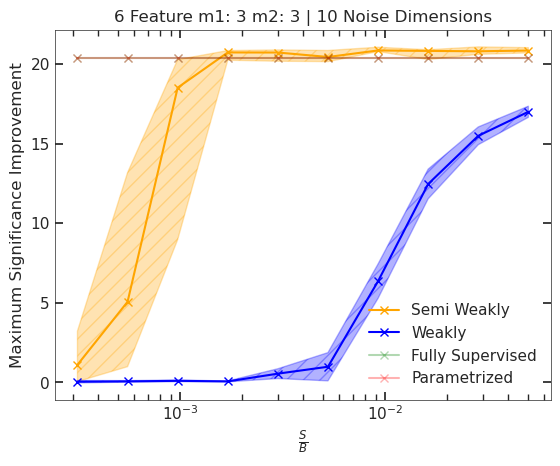

In [89]:
m1, m2 = 3, 3

msic1_ensemble = df["Semi-Weak Max Sics Medians"]
msic2_ensemble = df["CWOLA Max Sics Medians"]
std2_ensemble = df["CWOLA Max Sics Std"]
errhis = df["Semi-Weak Upper Quartile"]
errlows = df["Semi-Weak Lower Quartile"]
msic_full = df["FS Max Sics"]
msic_parametrized = df["Parametrized Max Sics"]

sigspace = np.logspace(-3.5, -1.3, 10)
plt.figure()
sea.set(style="white")
plt.plot(sigspace, msic1_ensemble, marker = "x", label='Semi Weakly', color='orange')
plt.plot(sigspace, msic2_ensemble, marker = "x", label='Weakly', color='blue')
plt.plot(sigspace, msic_full, marker = "x", label='Fully Supervised', color='green', alpha = 0.3)
plt.plot(sigspace, msic_parametrized, marker = "x", label='Parametrized', color='red', alpha = 0.3)

plt.fill_between(sigspace, errlows, errhis, color='orange', alpha=0.3, hatch = "//")
plt.fill_between(sigspace, msic2_ensemble - std2_ensemble, msic2_ensemble + std2_ensemble, color='blue', alpha=0.3, hatch = "//")

plt.xlabel(r'$\frac{S}{B}$')
plt.ylabel('Maximum Significance Improvement')
plt.title(f'6 Feature m1: {m1} m2: {m2} | 10 Noise Dimensions')
plt.xscale("log")
plt.legend(loc="lower right",frameon=False)
plt.gca().spines['left'].set_linewidth(0.5)
plt.gca().spines['bottom'].set_linewidth(0.5)
plt.gca().spines['top'].set_linewidth(0.5)
plt.gca().spines['right'].set_linewidth(0.5)
plt.tick_params(axis='both', which='both', direction='in', top=True, right=True)
plt.tick_params(axis='both', which='both', direction='in', bottom=True, left=True)
img_path = f"plots/maxsicplot{m1}{m2}_extra.png"
#plt.gca().xaxis.set_major_formatter(FuncFormatter(convert_units))
#plt.savefig(img_path, dpi=450, bbox_inches='tight')
plt.show()

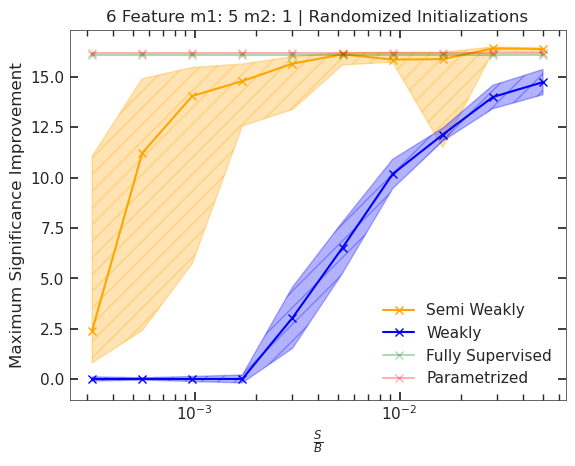

In [76]:
m1, m2 = 5, 1

msic1_ensemble = df["Semi-Weak Max Sics Medians"]
msic2_ensemble = df["CWOLA Max Sics Medians"]
std2_ensemble = df["CWOLA Max Sics Std"]
errhis = df["Semi-Weak Upper Quartile"]
errlows = df["Semi-Weak Lower Quartile"]
msic_full = df["FS Max Sics"]
msic_parametrized = df["Parametrized Max Sics"]

sigspace = np.logspace(-3.5, -1.3, 10)
plt.figure()
sea.set(style="white")
plt.plot(sigspace, msic1_ensemble, marker = "x", label='Semi Weakly', color='orange')
plt.plot(sigspace, msic2_ensemble, marker = "x", label='Weakly', color='blue')
plt.plot(sigspace, msic_full, marker = "x", label='Fully Supervised', color='green', alpha = 0.3)
plt.plot(sigspace, msic_parametrized, marker = "x", label='Parametrized', color='red', alpha = 0.3)

plt.fill_between(sigspace, errlows, errhis, color='orange', alpha=0.3, hatch = "//")
plt.fill_between(sigspace, msic2_ensemble - std2_ensemble, msic2_ensemble + std2_ensemble, color='blue', alpha=0.3, hatch = "//")

plt.xlabel(r'$\frac{S}{B}$')
plt.ylabel('Maximum Significance Improvement')
plt.title(f'6 Feature m1: {m1} m2: {m2} | Randomized Initializations')
plt.xscale("log")
plt.legend(loc="lower right",frameon=False)
plt.gca().spines['left'].set_linewidth(0.5)
plt.gca().spines['bottom'].set_linewidth(0.5)
plt.gca().spines['top'].set_linewidth(0.5)
plt.gca().spines['right'].set_linewidth(0.5)
plt.tick_params(axis='both', which='both', direction='in', top=True, right=True)
plt.tick_params(axis='both', which='both', direction='in', bottom=True, left=True)
img_path = f"plots/maxsicplot{m1}{m2}_extra.png"
#plt.gca().xaxis.set_major_formatter(FuncFormatter(convert_units))
#plt.savefig(img_path, dpi=450, bbox_inches='tight')
plt.show()

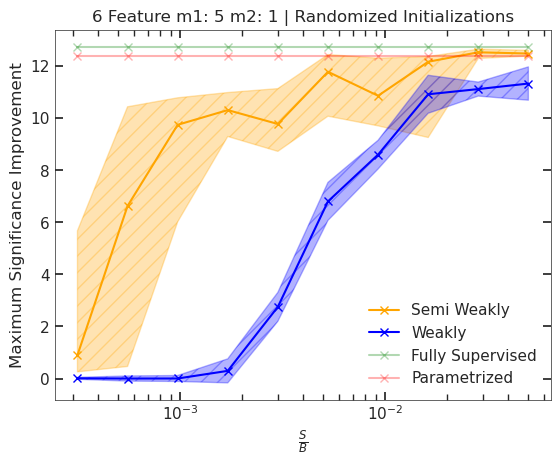

In [99]:
m1, m2 = 5, 1

msic1_ensemble = df["Semi-Weak Max Sics Medians"]
msic2_ensemble = df["CWOLA Max Sics Medians"]
std2_ensemble = df["CWOLA Max Sics Std"]
errhis = df["Semi-Weak Upper Quartile"]
errlows = df["Semi-Weak Lower Quartile"]
msic_full = df["FS Max Sics"]
msic_parametrized = df["Parametrized Max Sics"]

sigspace = np.logspace(-3.5, -1.3, 10)
plt.figure()
sea.set(style="white")
plt.plot(sigspace, msic1_ensemble, marker = "x", label='Semi Weakly', color='orange')
plt.plot(sigspace, msic2_ensemble, marker = "x", label='Weakly', color='blue')
plt.plot(sigspace, msic_full, marker = "x", label='Fully Supervised', color='green', alpha = 0.3)
plt.plot(sigspace, msic_parametrized, marker = "x", label='Parametrized', color='red', alpha = 0.3)

plt.fill_between(sigspace, errlows, errhis, color='orange', alpha=0.3, hatch = "//")
plt.fill_between(sigspace, msic2_ensemble - std2_ensemble, msic2_ensemble + std2_ensemble, color='blue', alpha=0.3, hatch = "//")

plt.xlabel(r'$\frac{S}{B}$')
plt.ylabel('Maximum Significance Improvement')
plt.title(f'6 Feature m1: {m1} m2: {m2} | Randomized Initializations')
plt.xscale("log")
plt.legend(loc="lower right",frameon=False)
plt.gca().spines['left'].set_linewidth(0.5)
plt.gca().spines['bottom'].set_linewidth(0.5)
plt.gca().spines['top'].set_linewidth(0.5)
plt.gca().spines['right'].set_linewidth(0.5)
plt.tick_params(axis='both', which='both', direction='in', top=True, right=True)
plt.tick_params(axis='both', which='both', direction='in', bottom=True, left=True)
img_path = f"plots/maxsicplot{m1}{m2}_extra.png"
#plt.gca().xaxis.set_major_formatter(FuncFormatter(convert_units))
#plt.savefig(img_path, dpi=450, bbox_inches='tight')
plt.show()

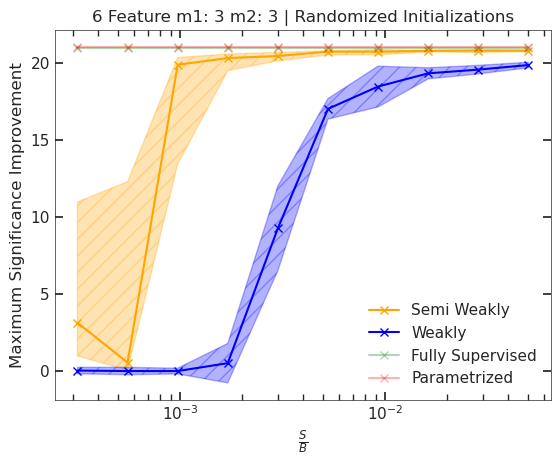

In [34]:
m1, m2 = 3, 3

msic1_ensemble = df["Semi-Weak Max Sics Medians"]
msic2_ensemble = df["CWOLA Max Sics Medians"]
std2_ensemble = df["CWOLA Max Sics Std"]
errhis = df["Semi-Weak Upper Quartile"]
errlows = df["Semi-Weak Lower Quartile"]

sigspace = np.logspace(-3.5, -1.3, 10)
plt.figure()
sea.set(style="white")
plt.plot(sigspace, msic1_ensemble, marker = "x", label='Semi Weakly', color='orange')
plt.plot(sigspace, msic2_ensemble, marker = "x", label='Weakly', color='blue')
plt.plot(sigspace, [maxsic_full]*len(sigspace), marker = "x", label='Fully Supervised', color='green', alpha = 0.3)
plt.plot(sigspace, [maxsic_parametrized]*len(sigspace), marker = "x", label='Parametrized', color='red', alpha = 0.3)

plt.fill_between(sigspace, errlos, errhis, color='orange', alpha=0.3, hatch = "//")
plt.fill_between(sigspace, msic2_ensemble - std2_ensemble, msic2_ensemble + std2_ensemble, color='blue', alpha=0.3, hatch = "//")

plt.xlabel(r'$\frac{S}{B}$')
plt.ylabel('Maximum Significance Improvement')
plt.title(f'6 Feature m1: {m1} m2: {m2} | Randomized Initializations')
plt.xscale("log")
plt.legend(loc="lower right",frameon=False)
plt.gca().spines['left'].set_linewidth(0.5)
plt.gca().spines['bottom'].set_linewidth(0.5)
plt.gca().spines['top'].set_linewidth(0.5)
plt.gca().spines['right'].set_linewidth(0.5)
plt.tick_params(axis='both', which='both', direction='in', top=True, right=True)
plt.tick_params(axis='both', which='both', direction='in', bottom=True, left=True)
img_path = f"plots/maxsicplot{m1}{m2}_extra.png"
#plt.savefig(img_path, dpi=450, bbox_inches='tight')
plt.show()

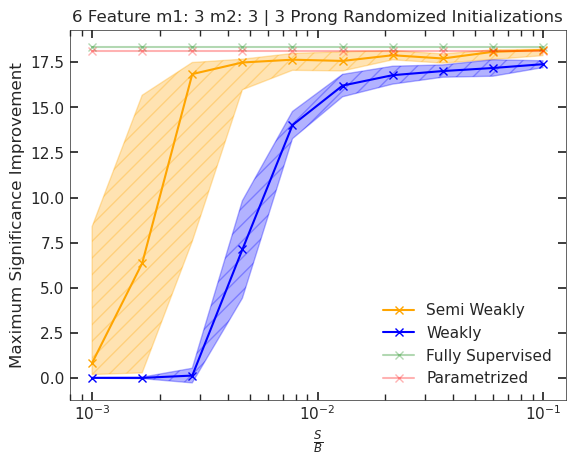

In [11]:
m1, m2 = 3, 3

msic1_ensemble = np.array(max_sics)
std1_ensemble = np.array(max_std)
msic2_ensemble = np.array(max_sics2)
std2_ensemble = np.array(max_std2)

sigspace = np.logspace(-3, -1, 10)
plt.figure()
sea.set(style="white")
plt.plot(sigspace, msic1_ensemble, marker = "x", label='Semi Weakly', color='orange')
plt.plot(sigspace, msic2_ensemble, marker = "x", label='Weakly', color='blue')
plt.plot(sigspace, [maxsic_full]*len(sigspace), marker = "x", label='Fully Supervised', color='green', alpha = 0.3)
plt.plot(sigspace, [maxsic_parametrized]*len(sigspace), marker = "x", label='Parametrized', color='red', alpha = 0.3)

plt.fill_between(sigspace, errlos, errhis, color='orange', alpha=0.3, hatch = "//")
plt.fill_between(sigspace, msic2_ensemble - std2_ensemble, msic2_ensemble + std2_ensemble, color='blue', alpha=0.3, hatch = "//")

plt.xlabel(r'$\frac{S}{B}$')
plt.ylabel('Maximum Significance Improvement')
plt.title(f'6 Feature m1: {m1} m2: {m2} | 3 Prong Randomized Initializations')
plt.xscale("log")
plt.legend(loc="lower right",frameon=False)
plt.gca().spines['left'].set_linewidth(0.5)
plt.gca().spines['bottom'].set_linewidth(0.5)
plt.gca().spines['top'].set_linewidth(0.5)
plt.gca().spines['right'].set_linewidth(0.5)
plt.tick_params(axis='both', which='both', direction='in', top=True, right=True)
plt.tick_params(axis='both', which='both', direction='in', bottom=True, left=True)
img_path = f"plots/maxsicplot{m1}{m2}_extra.png"
#plt.savefig(img_path, dpi=450, bbox_inches='tight')
plt.show()

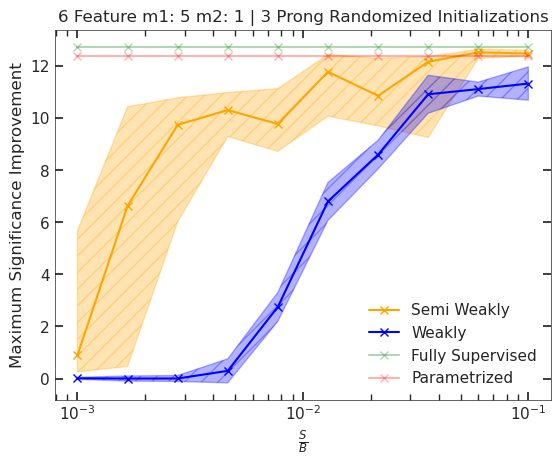

In [13]:
m1, m2 = 5, 1

msic1_ensemble = np.array(max_sics)
std1_ensemble = np.array(max_std)
msic2_ensemble = np.array(max_sics2)
std2_ensemble = np.array(max_std2)

sigspace = np.logspace(-3, -1, 10)
plt.figure()
sea.set(style="white")
plt.plot(sigspace, msic1_ensemble, marker = "x", label='Semi Weakly', color='orange')
plt.plot(sigspace, msic2_ensemble, marker = "x", label='Weakly', color='blue')
plt.plot(sigspace, [maxsic_full]*len(sigspace), marker = "x", label='Fully Supervised', color='green', alpha = 0.3)
plt.plot(sigspace, [maxsic_parametrized]*len(sigspace), marker = "x", label='Parametrized', color='red', alpha = 0.3)

plt.fill_between(sigspace, errlos, errhis, color='orange', alpha=0.3, hatch = "//")
plt.fill_between(sigspace, msic2_ensemble - std2_ensemble, msic2_ensemble + std2_ensemble, color='blue', alpha=0.3, hatch = "//")

plt.xlabel(r'$\frac{S}{B}$')
plt.ylabel('Maximum Significance Improvement')
plt.title(f'6 Feature m1: {m1} m2: {m2} | 3 Prong Randomized Initializations')
plt.xscale("log")
plt.legend(loc="lower right",frameon=False)
plt.gca().spines['left'].set_linewidth(0.5)
plt.gca().spines['bottom'].set_linewidth(0.5)
plt.gca().spines['top'].set_linewidth(0.5)
plt.gca().spines['right'].set_linewidth(0.5)
plt.tick_params(axis='both', which='both', direction='in', top=True, right=True)
plt.tick_params(axis='both', which='both', direction='in', bottom=True, left=True)
img_path = f"plots/maxsicplot{m1}{m2}_extra.png"
#plt.savefig(img_path, dpi=450, bbox_inches='tight')
plt.show()

In [10]:
#from plotting import create_3D_loss_manifold
import imageio
m1,m2 = 3, 3
z = np.load(f"data/landscapes/z_6_3_{m1}{m2}_0.25_qq_extra.npy", allow_pickle = True).item()
#sigspace = np.flip(np.logspace(-3,-1,10)[0])

step = 0.25
elv = 60
azim = 20
frames = []
for azim in np.arange(0, 360, 1):
    create_3D_loss_manifold(0.001, m1, m2, z, step, elev, azim, save=False, decay="qq")
    
    plt.draw()
    frame = np.array(plt.gcf().canvas.renderer.buffer_rgba())
    frames.append(frame)
    
    plt.close()

imageio.mimsave('loss_manifold_rotate.gif', frames)
#plot = create_3D_loss_manifold(sigspace, m1, m2, z, step, elv, azim, save = False, decay = "qq")

AttributeError: 'Colorbar' object has no attribute 'set_clim'

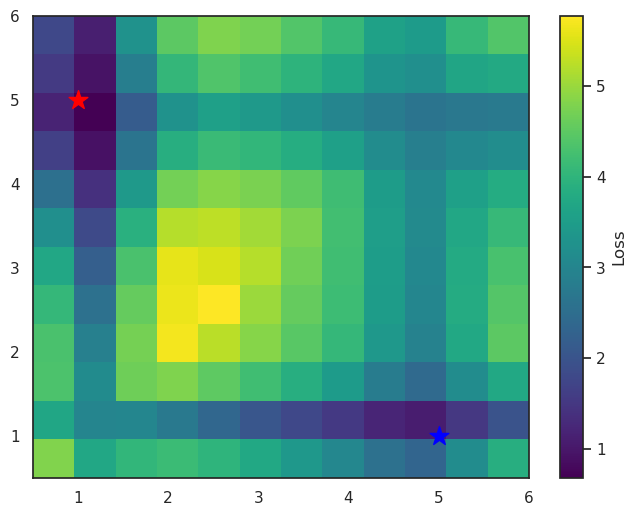

In [46]:
def loss_landscape_nofit(sigfrac, m1, m2, z, step=0.5):
    start = 0.5
    end = 6
    step = step
    decay = "qqq"
    
    weight_list = np.arange(start, end + step, step)
    grid_axes = [(w1, w2) for w1 in weight_list for w2 in weight_list]
    w1_values, w2_values = zip(*grid_axes)

    loss_values = np.array(z[sigfrac, m1, m2, decay])
    #min_loss = min(loss_values)
    #max_loss = max(loss_values)
    #normalized_loss = [(x - min_loss) / (max_loss - min_loss) for x in loss_values]
    bins = int(np.sqrt(len(z[sigfrac, m1, m2, decay])))

    star1_coords = (m1, m2)
    star2_coords = (m2, m1)

    plt.figure(figsize=(8, 6))
    h = plt.hist2d(w1_values, w2_values, bins=(bins, bins), cmap='viridis', weights=loss_values)
    plt.scatter(*star1_coords, c='red', marker='*', s=200, label='Star 1')
    plt.scatter(*star2_coords, c='blue', marker='*', s=200, label='Star 2')
    plt.colorbar(h[3], label='Loss').set_clim(vmin=np.min(loss_values), vmax=np.max(loss_values))
    plt.xlabel('m1')
    plt.ylabel('m2')
    plt.title('6 Features (m1 = {} | m2 = {})'.format(m1, m2))
    plt.legend()
    plt.show()
    
    return h
z = np.load("data/landscapes/z_6_2_15_0.5_qqq_extra_FSLandscapeSignalOnly_False.npy", allow_pickle = True).item()
loss_landscape_nofit(sigspace[2], 1, 5, z);

In [7]:
z.keys()

dict_keys([(0.0009747402255566064, 1, 5, 'qqq'), (0.0030045385302046933, 1, 5, 'qqq')])

In [23]:
z = np.load("data/landscapes/z_6_4_15_0.5_qqq_extra_FSLandscape_False.npy", allow_pickle = True).item()
#z = np.load("data/landscapes/z_6_4_15_0.5_qqq_extra_23prongFixedSignal_False.npy", allow_pickle = True).item()

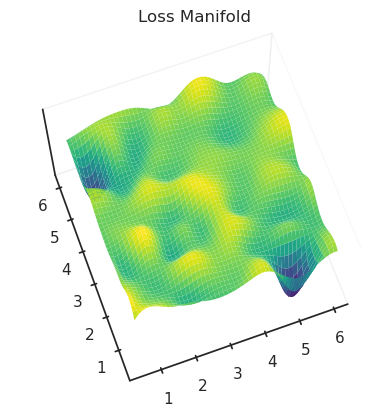

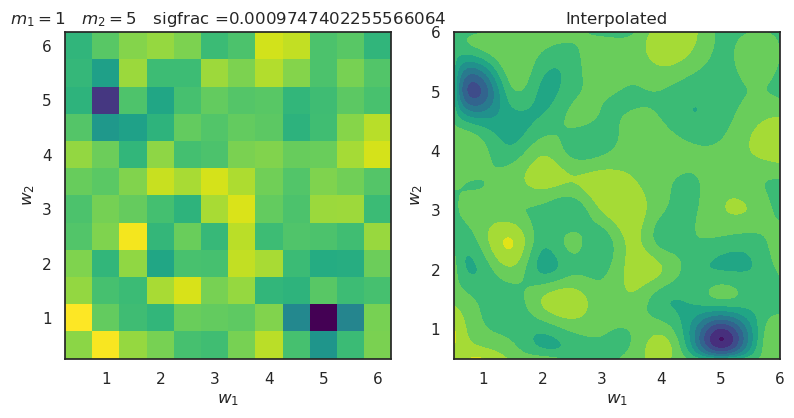

In [2]:
def plot_interpolated_landscape(sigfrac, m1, m2, z, step, decay):
    
    decay = decay
    start = 0.5
    end = 6
    step = step

    weight_list = np.arange(start, end + step, step)

    x_values = weight_list
    y_values = weight_list

    x, y = np.meshgrid(x_values, y_values)

    loss_values_flat = z[sigfrac, m1, m2, decay]
    
    loss_values = np.array(loss_values_flat).reshape(x.shape)

    interp_spline = RectBivariateSpline(x_values, y_values, loss_values, s = 0)

    xi, yi = np.meshgrid(np.linspace(min(x_values), max(x_values), 1000), np.linspace(min(y_values), max(y_values), 1000))
    zi = interp_spline(xi[0, :], yi[:, 0])
    
    #3d projection
    fig = plt.figure()
    ax3d = fig.add_subplot(111, projection='3d')
    ax3d.plot_surface(xi, yi, zi, cmap='viridis', edgecolor='none', linewidth = 0)
    ax3d.set_title("Loss Manifold")
    ax3d.xaxis.pane.fill = False
    ax3d.yaxis.pane.fill = False
    ax3d.zaxis.pane.fill = False

    ax3d.grid(False)
    
    #ax.set_xticks([])
    #ax.set_yticks([])
    ax3d.set_zticks([])
    ax3d.view_init(elev=70, azim=250)

    #2d projection
    fig, ax = plt.subplots(1, 2, figsize=(8, 6))
    ax[0].pcolormesh(x, y, loss_values, cmap='viridis')
    ax[0].set_aspect("equal")
    ax[0].set_title(f"$m_{1} = {m1} \quad m_{2} = {m2} \quad$" + f"sigfrac ={sigfrac}")
    ax[0].set_xlabel(r"$w_{1}$")
    ax[0].set_ylabel(r"$w_{2}$")

    ax[1].contourf(xi, yi, zi, cmap='viridis', levels = 10)
    ax[1].set_aspect("equal")
    ax[1].set_title('Interpolated'.format(m1, m2, sigfrac))
    ax[1].set_xlabel(r"$w_{1}$")
    ax[1].set_ylabel(r"$w_{2}$")

    plt.tight_layout()
    #plt.savefig('interpolation3.55.5.png', dpi=450, bbox_inches='tight')
    return fig

z = np.load("data/landscapes/z_6_4_15_0.5_qqq_extra_23prong_fixed_Train_Val_False.npy", allow_pickle = True).item()
sigspace = np.logspace(-3.5, -1.3, 10)
plot_interpolated_landscape(sigspace[2], 1, 5, z, 0.5, "qqq")
plt.show()

In [205]:
z.keys()

dict_keys([(0.0009747402255566064, 1, 5, 'qq'), (0.0030045385302046933, 1, 5, 'qq')])

In [60]:
z.keys()

dict_keys([(0.00031622776601683794, 3, 3, 'qqq'), (0.0005551935914386209, 3, 3, 'qqq'), (0.0009747402255566064, 3, 3, 'qqq'), (0.001711328304161781, 3, 3, 'qqq')])

In [56]:
sigspace[6]

0.009261187281287938

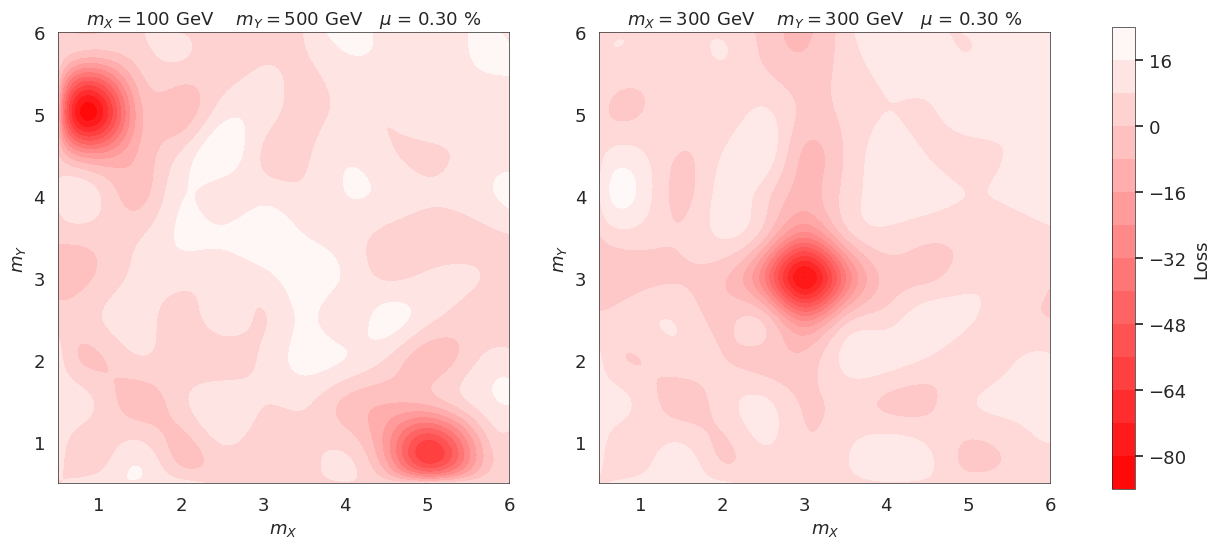

In [92]:
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.gridspec import GridSpec
#import matplotlib
#matplotlib.use('pdf')
#import matplotlib.pyplot as plt

sigspace = np.logspace(-3.5, -1.3, 10)
sigfrac = sigspace[4]
decay = "qqq"
m1, m2 = 1, 5
m1_2, m2_2 = 3, 3
z1 = np.load("data/landscapes/z_6_4_15_0.5_qqq_extra_23prong_fixedNEW_False.npy", allow_pickle = True).item()
z2 = np.load("data/landscapes/z_6_4_33_0.5_qqq_extra_23prong_fixedNEW_False.npy", allow_pickle = True).item()
sigspace = np.logspace(-3.5, -1.3, 10)
save = False

start = 0.5
end = 6
step = 0.5

weight_list = np.arange(start, end + step, step)

x_values = weight_list
y_values = weight_list

x, y = np.meshgrid(x_values, y_values)

loss_values_flat = z1[sigfrac, m1, m2, decay]
loss_values = np.transpose(np.array(loss_values_flat).reshape(x.shape))

interp_spline = RectBivariateSpline(x_values, y_values, loss_values, s = 0)

xi, yi = np.meshgrid(np.linspace(min(x_values), max(x_values), 1000), np.linspace(min(y_values), max(y_values), 1000))
zi = interp_spline(xi[0, :], yi[:, 0])

loss_values_flat2 = z2[sigfrac, m1_2, m2_2, decay]
loss_values2 = np.transpose(np.array(loss_values_flat2).reshape(x.shape))

interp_spline2 = RectBivariateSpline(x_values, y_values, loss_values2, s = 0)

xi2, yi2 = np.meshgrid(np.linspace(min(x_values), max(x_values), 1000), np.linspace(min(y_values), max(y_values), 1000))
zi2 = interp_spline2(xi2[0, :], yi2[:, 0])

#2d projection
fig = plt.figure(figsize=(16, 6))
gs = GridSpec(1, 2, figure=fig)
colors = [(1, 0, 0), (1, 1, 1)]

cmap = LinearSegmentedColormap.from_list('blue_white', colors)  
#cmap = "viridis"

fontsize = 13
levels = 15
zoffset = (zi - np.log(2)) * 1000000
zoffset2 = (zi2 - np.log(2)) * 1000000

ax0 = fig.add_subplot(gs[0, 0])
h1 = ax0.contourf(xi, yi, zoffset, cmap=cmap, levels=levels)
ax0.set_aspect("equal")
ax0.set_title(f"$m_X = {m1*100}$ GeV $\quad m_Y = {m2*100}$ GeV" + f"$\quad \\mu$ = {sigfrac * 100:.2f} %", fontsize=fontsize)
ax0.set_xlabel(r"$m_{X}$", fontsize=fontsize)
ax0.set_ylabel(r"$m_{Y}$", fontsize=fontsize)
ax0.tick_params(axis='x', labelsize=fontsize)
ax0.tick_params(axis='y', labelsize=fontsize)

for spine in ax0.spines.values():
    spine.set_linewidth(0.5)

ax1 = fig.add_subplot(gs[0, 1])
h2 = ax1.contourf(xi2, yi2, zoffset2, cmap=cmap, levels=levels)
ax1.set_aspect("equal")
ax1.set_title(f"$m_X = {m1_2*100}$ GeV $\quad m_Y = {m2_2*100}$ GeV" + f"$\quad \\mu$ = {sigfrac * 100:.2f} %", fontsize=fontsize)
ax1.set_xlabel(r"$m_{X}$", fontsize=fontsize)
ax1.set_ylabel(r"$m_{Y}$", fontsize=fontsize)
ax1.tick_params(axis='x', labelsize=fontsize)
ax1.tick_params(axis='y', labelsize=fontsize)

for spine in ax1.spines.values():
    spine.set_linewidth(0.5)

cbar = fig.colorbar(h1, ax=[ax0, ax1], location='right', shrink=1)
cbar.set_label('Loss', fontsize=fontsize)
cbar.ax.tick_params(labelsize=fontsize)

for spine in cbar.ax.spines.values():
    spine.set_linewidth(0.5)

if save == True:
    plt.savefig(f'plots/losslandscapes_{sigfrac:.4f}transposed.pdf', dpi=450, bbox_inches='tight', format='pdf')

In [96]:
start = 0.5
end = 6
step = 0.25

weight_list = np.arange(start, end + step, step)

x_values = weight_list
y_values = weight_list

x, y = np.meshgrid(x_values, y_values)

#loss_values_flat = np.array(z[1e-6, 5, 1, "qq"])[:,0]
loss_values_flat = z[sigspace[9], 5, 1, 'qq']
loss_values = np.array(loss_values_flat).reshape(x.shape)

In [115]:
def loss_landscape_nofit(sigfrac, m1, m2, z, step=0.25, save = False, decay = "qq"):
    start = 0.5
    end = 6
    step = step
    
    weight_list = np.arange(start, end + step, step)
    grid_axes = [(w1, w2) for w1 in weight_list for w2 in weight_list]
    w1_values, w2_values = zip(*grid_axes)

    loss_values = list(z[sigfrac, m1, m2, decay])
    min_loss = min(loss_values)
    max_loss = max(loss_values)
    #normalized_loss = [(x - min_loss) / (max_loss - min_loss) for x in loss_values]
    bins = int(np.sqrt(len(z[sigfrac, m1, m2, decay])))

    star1_coords = (m1, m2)
    star2_coords = (m2, m1)

    plt.figure(figsize=(8, 6))
    h = plt.hist2d(w1_values, w2_values, bins=(bins, bins), cmap='viridis', weights=loss_values)
    plt.scatter(*star1_coords, c='red', marker='*', s=200, label='Star 1')
    plt.scatter(*star2_coords, c='blue', marker='*', s=200, label='Star 2')
    plt.xlabel('m1')
    plt.ylabel('m2')
    plt.title('6 Features (m1 = {} | m2 = {}) sigfrac: {:.4f}'.format(m1, m2, sigfrac))
    plt.colorbar(h[3])
    plt.legend()
    plt.show()
    
    if save == True:
        plt.savefig(f'plots/landscape{float(m1)}{float(m2)}_{decay}.png', dpi=450, bbox_inches='tight')
    
    return h

<Axes3D: title={'center': 'Loss Manifold m1: 3 m2: 3 sigfrac: 0.0003'}, xlabel='W1', ylabel='W2', zlabel='Loss'>

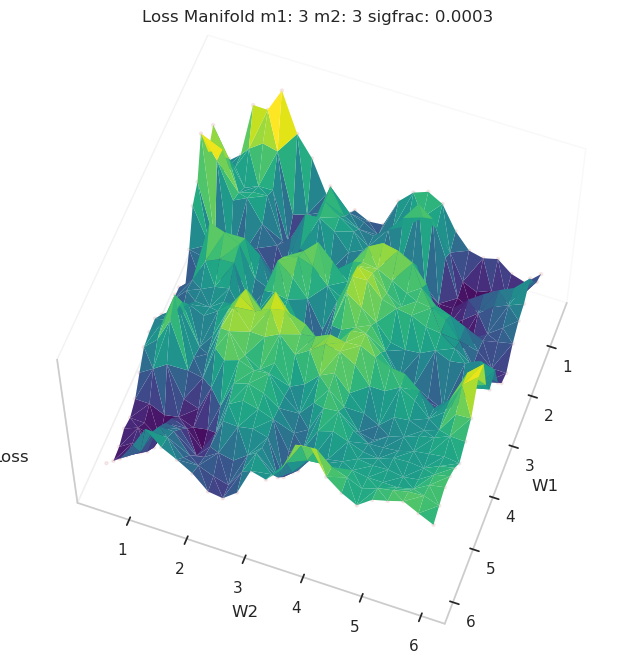

In [121]:
def create_3D_loss_manifold(sigfrac, m1, m2, z, step, elev, azim, save = False, decay = "qq"):

    start = 0.5
    end = 6
    step = step

    weight_list = np.arange(start, end + step, step)

    grid_axes = []
    for w1 in weight_list:
        for w2 in weight_list:
            grid_axes.append((w1, w2))

    w1_values, w2_values = zip(*grid_axes)

    loss_values = list(z[sigfrac, m1, m2, decay])

    x = w1_values
    y = w2_values
    z = loss_values

    sea.set(style="whitegrid")
    fig = plt.figure(figsize = (10,8))
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(x, y, z, c='r', marker='.', alpha = 0.1)
    ax.plot_trisurf(x, y, z, cmap='viridis', edgecolor='none')

    ax.set_xlabel('W1')
    ax.set_ylabel('W2')
    ax.set_zlabel('Loss')
    ax.set_title(f"Loss Manifold m1: {m1} m2: {m2} sigfrac: {np.round(sigfrac, 4)}")

    ax.xaxis.pane.fill = False
    ax.yaxis.pane.fill = False
    ax.zaxis.pane.fill = False

    ax.grid(False)
    
    #ax.set_xticks([])
    #ax.set_yticks([])
    ax.set_zticks([])
    
    ax.view_init(elev=elev, azim=azim)
    
    if save == True:
        plt.savefig(f'plots/manifold{float(m1)}{float(m2)}.png', dpi=450, bbox_inches='tight')
    return ax

create_3D_loss_manifold(sigspace[0], 3, 3, z, 0.25, 60, 20, save = False, decay = "qq")

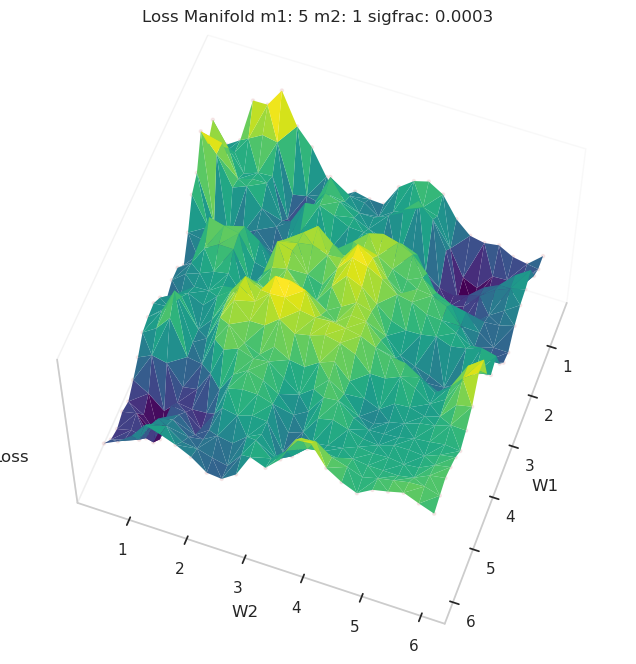

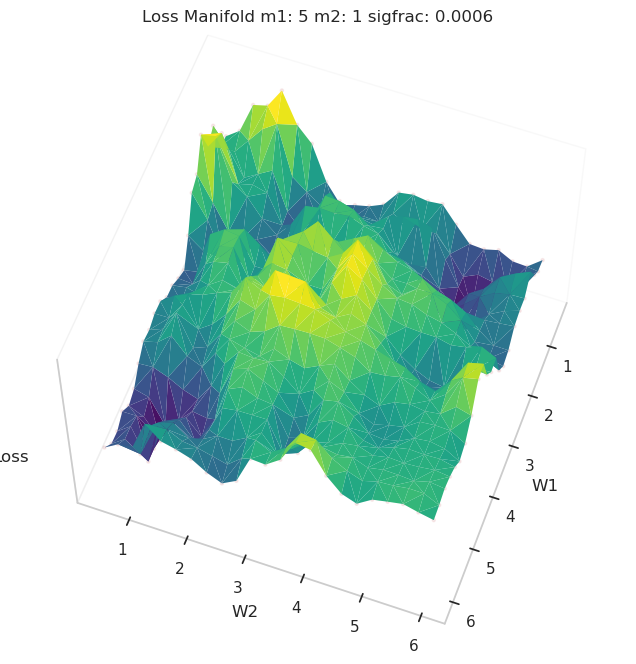

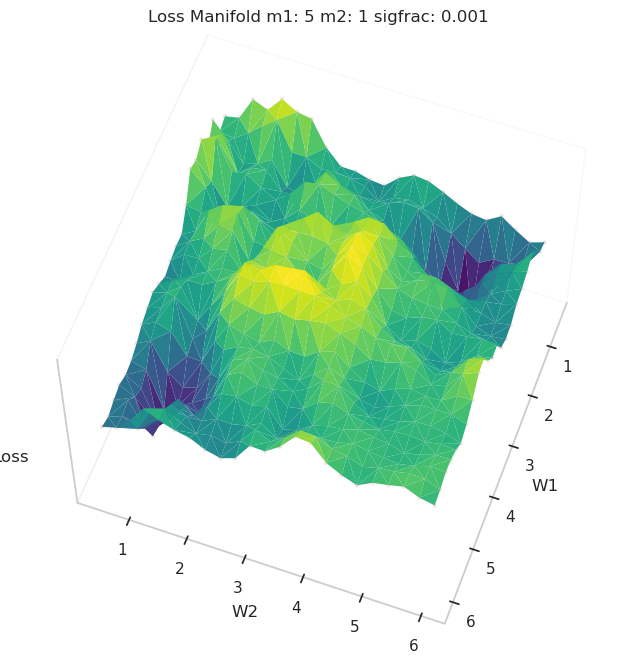

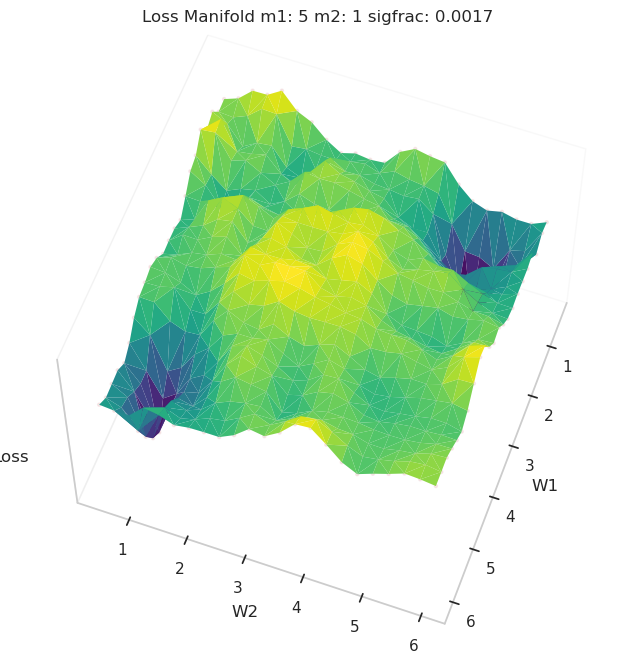

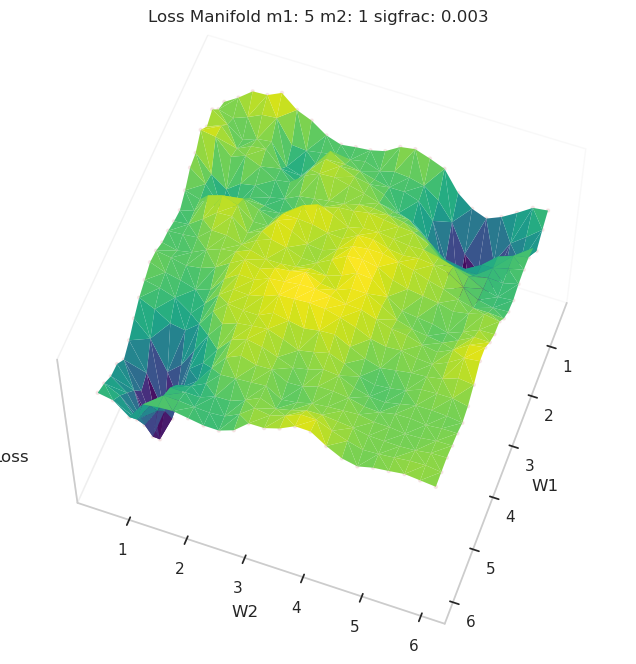

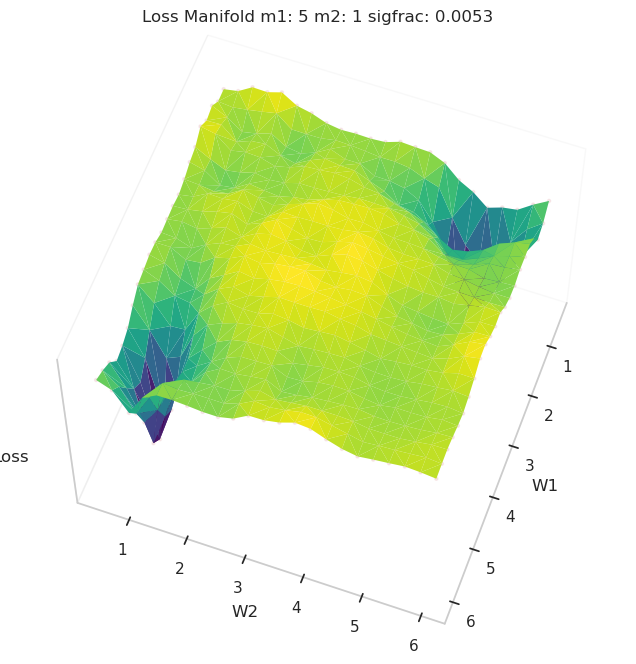

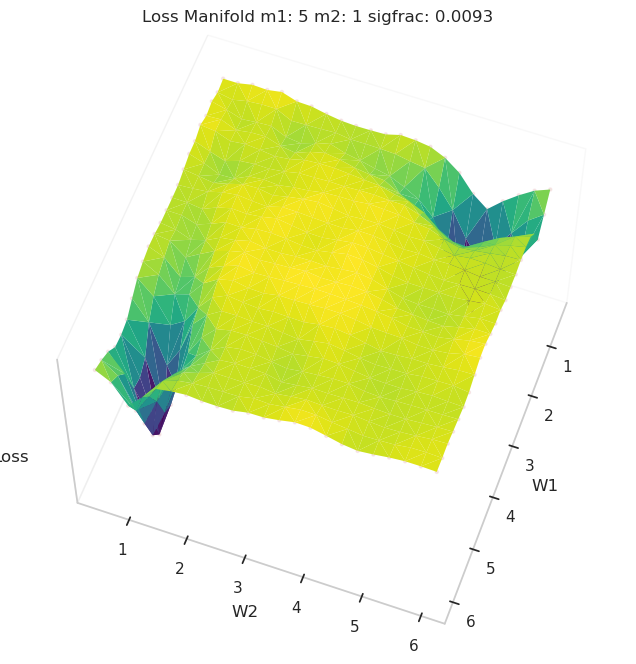

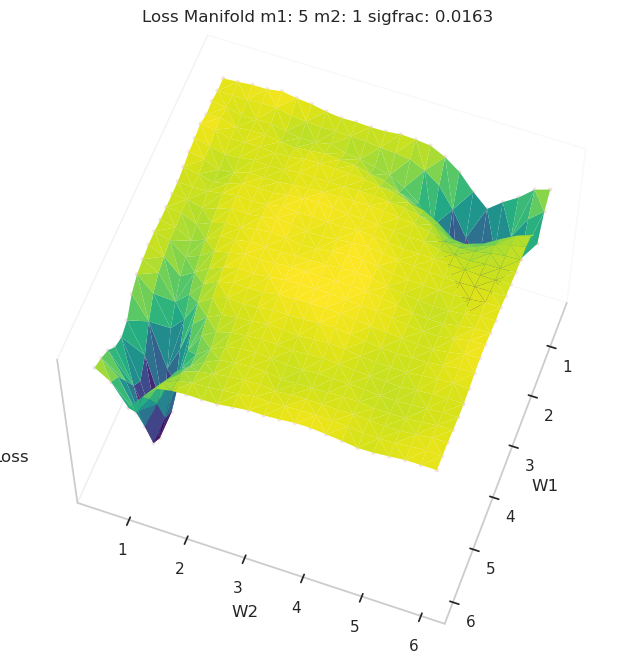

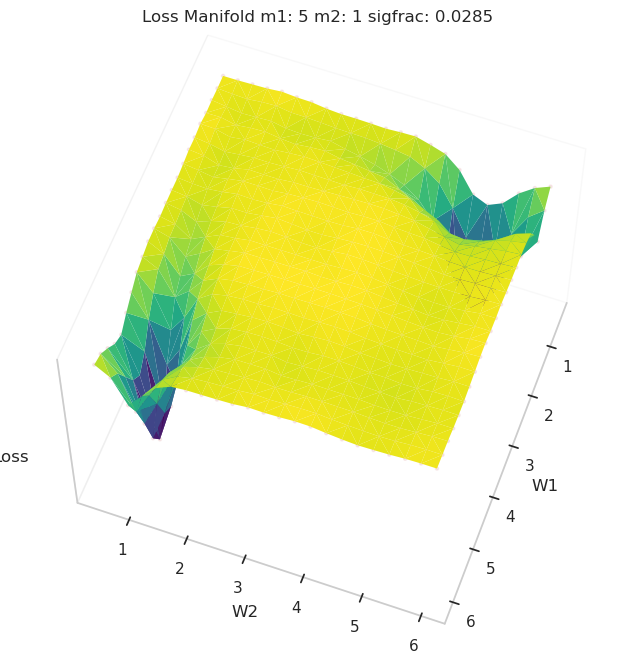

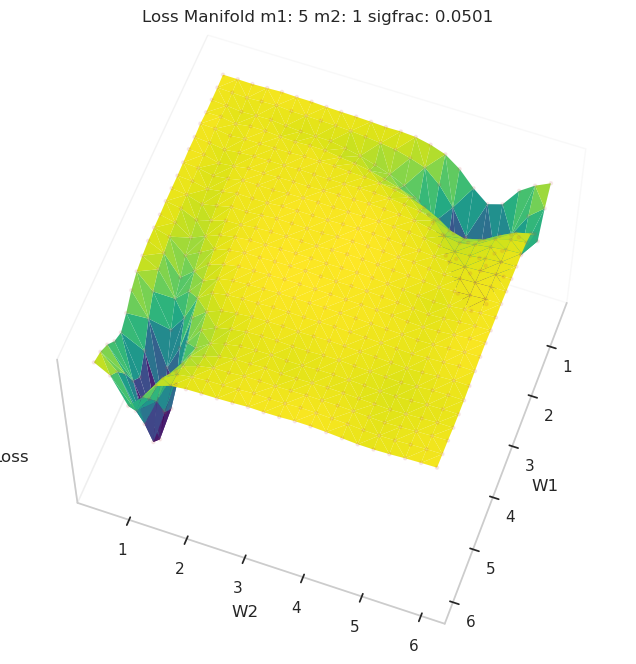

In [125]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from PIL import Image,ImageSequence
from IPython.display import clear_output
def create_gif_manifold(sigspace, m1, m2, z, step, elv, azim, save = False):
    
    output_directory = '2dhist_images'
    os.makedirs(output_directory, exist_ok=True)
    
    sigspace = sigspace
    
    frames = []
    for sig in sigspace:
        
        print(sig)
        fig = plt.figure(figsize = (10,8))
        #ax = fig.add_subplot(111, projection='3d')
        ax = create_3D_loss_manifold(sig, m1, m2, z, step, elv, azim, save)

        image_path = os.path.join(output_directory, f'hist_{sig}.png')
        plt.savefig(image_path, dpi = 450, bbox_inches='tight')
        plt.close(fig)
        clear_output(wait=True)

        frames.append(Image.open(image_path))

    output_gif_filename = f'LossManifoldformated{m1}{m2}qqshift.gif'
    frames[0].save(output_gif_filename, save_all=True, append_images=frames[1:], duration=800, loop=0)
    
    #plt.savefig('plot.png', dpi=450, bbox_inches='tight')
z = np.load("data/landscapes/z_6_3_51_0.25_qq_extra_decent-sun-87qq_False.npy", allow_pickle = True).item()
create_gif_manifold(sigspace, 5, 1, z, 0.25, 60, 20, save = False)

In [172]:
def AUC_landscape_nofit(sigfrac, m1, m2, a, step=0.25, save = False):
    start = 0.5
    end = 6
    step = step
    
    weight_list = np.arange(start, end + step, step)
    grid_axes = [(w1, w2) for w1 in weight_list for w2 in weight_list]
    w1_values, w2_values = zip(*grid_axes)

    loss_values = list(a[sigfrac, m1, m2])
    min_loss = min(loss_values)
    max_loss = max(loss_values)
    normalized_loss = [(x - min_loss) / (max_loss - min_loss) for x in loss_values]
    bins = int(np.sqrt(len(z[sigfrac, m1, m2])))

    star1_coords = (m1, m2)
    star2_coords = (m2, m1)

    plt.figure(figsize=(8, 6))
    h = plt.hist2d(w1_values, w2_values, bins=(bins, bins), cmap='viridis', weights=normalized_loss)
    plt.scatter(*star1_coords, c='red', marker='*', s=200, label='Star 1')
    plt.scatter(*star2_coords, c='blue', marker='*', s=200, label='Star 2')
    plt.colorbar(label='Loss (BCE)')
    plt.xlabel('m1')
    plt.ylabel('m2')
    plt.title('6 Features (m1 = {} | m2 = {}) sigfrac AUC Landscape: {:.4f}'.format(m1, m2, sigfrac))
    plt.legend()
    plt.show()
    
    if save == True:
        plt.savefig(f'plots/landscape{float(m1)}{float(m2)}.png', dpi=450, bbox_inches='tight')
    
    return h

In [55]:
def plot_landscapes(sigfrac, m1, m2, z, a, step, save = False):
    start = 0.5
    end = 6
    step = step

    #weightspace
    weight_list = np.arange(start, end + step, step)
    grid_axes = [(w1, w2) for w1 in weight_list for w2 in weight_list]
    w1_values, w2_values = zip(*grid_axes)

    #loss
    loss_values = list(z[sigfrac, m1, m2])
    min_loss = min(loss_values)
    max_loss = max(loss_values)
    normalized_loss = [(x - min_loss) / (max_loss - min_loss) for x in loss_values]
    
    AUC_values = list(a[sigfrac, m1, m2])
    min_AUC = min(AUC_values)
    max_AUC = max(AUC_values)
    normalized_AUC = [(x - min_AUC) / (max_AUC - min_AUC) for x in AUC_values]

    bins = int(np.sqrt(len(a[sigfrac, m1, m2])))

    star1_coords = (m1, m2)
    star2_coords = (m2, m1)

    fig, ax = plt.subplots(1, 2, figsize=(18, 6))
    ax[0].hist2d(w1_values, w2_values, bins = (bins, bins), cmap='viridis', weights=normalized_loss)
    ax[0].set_aspect("equal")
    ax[0].set_title(f"Loss Landscape")
    ax[0].set_xlabel(r"$w_{1}$")
    ax[0].set_ylabel(r"$w_{2}$")
    ax[0].scatter(*star1_coords, c='red', marker='*', s=200, label='Star 1')
    ax[0].scatter(*star2_coords, c='blue', marker='*', s=200, label='Star 2')
    
    ax[1].hist2d(w1_values, w2_values, bins = (bins, bins), cmap='viridis', weights=normalized_AUC)
    ax[1].set_aspect("equal")
    ax[1].set_title("AUC Landscape")
    ax[1].set_xlabel(r"$w_{1}$")
    ax[1].set_ylabel(r"$w_{2}$")
    ax[1].scatter(*star1_coords, c='red', marker='*', s=200, label='Star 1')
    ax[1].scatter(*star2_coords, c='blue', marker='*', s=200, label='Star 2')

    # Create colorbars associated with each subplot
    cbar1 = fig.colorbar(ax[0].collections[0], ax=ax[0])
    cbar2 = fig.colorbar(ax[1].collections[0], ax=ax[1])

    # Set label for colorbars
    cbar1.set_label('Loss')
    cbar2.set_label('AUC')
    
    plt.subplots_adjust(top=0.85)
    #plt.tight_layout()
    fig.suptitle(f"$m_{1}: ${m1 * 100} $m_{2}: {m2 * 100}$")
    if save == True:
        plt.savefig(f'plots/bothlandscape{float(m1)}{float(m2)}.png', dpi=450, bbox_inches='tight')
    return ax

In [1]:
feature_dims = 6
parameters = 3
m1 = 5
m2 = 1
step = 0.25
z = np.load(f"data/landscapes/z_{feature_dims}_{parameters}_{m1}{m2}_{step}.npy", allow_pickle = True).item()
a = np.load(f"data/landscapes/a_{feature_dims}_{parameters}_{m1}{m2}_{step}.npy", allow_pickle = True).item()
plot_landscapes(0.1, m1, m2, z, a, step, save = True);

In [2]:
feature_dims = 6
parameters = 3
m1 = 3
m2 = 3
step = 0.25
z = np.load(f"data/landscapes/z_{feature_dims}_{parameters}_{m1}{m2}_{step}.npy", allow_pickle = True).item()
a = np.load(f"data/landscapes/a_{feature_dims}_{parameters}_{m1}{m2}_{step}.npy", allow_pickle = True).item()
plot_landscapes(0.1, m1, m2, z, a, step, save = True);

In [3]:
AUC_landscape_nofit(0.1, 5, 1, a, 0.25, False);

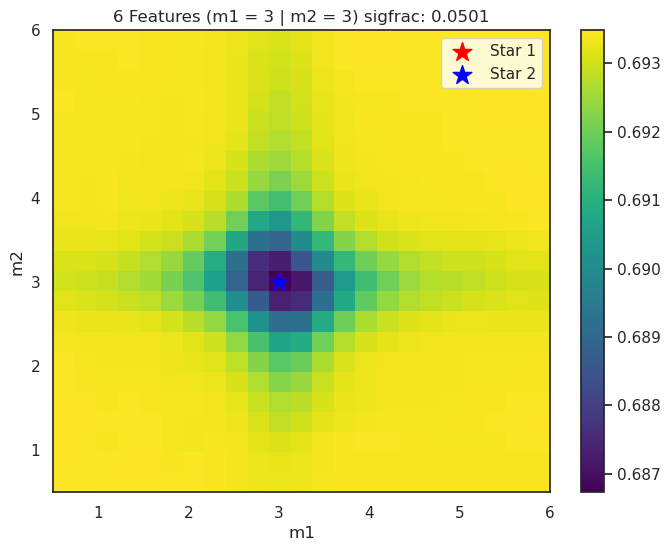

In [120]:
from IPython.display import display, clear_output
from PIL import Image, ImageSequence
import os
z = np.load("data/landscapes/z_6_3_33_0.25_qq_extra_decent-sun-87qq_False.npy", allow_pickle = True).item()
def create_gif_nofit(m1, m2, z):
    
    output_directory = '2dhist_images'
    os.makedirs(output_directory, exist_ok=True)
    
    sigspace = np.logspace(-3.5, -1.3, 10)
    
    frames = []
    for sb in sigspace:
    
        loss_landscape_nofit(sb, m1, m2, z)

        image_path = os.path.join(output_directory, f'hist_{sb}.png')
        plt.savefig(image_path)
        plt.close()
        clear_output(wait=True)

        # Append the image to the frames list
        frames.append(Image.open(image_path))

    # Create the final GIF that combines all frames
    output_gif_filename = f'sigspace{m1}{m2}fixed.gif'
    frames[0].save(output_gif_filename, save_all=True, append_images=frames[1:], duration=5000, loop=0)
    
create_gif_nofit(3, 3, z)